In [1]:
#import all require libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [7]:
df = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [8]:
#read dataframes
CustomerDemographic = pd.read_excel(df, 'CustomerDemographic')
Transactions = pd.read_excel(df, 'Transactions')
NewCustomerList = pd.read_excel(df, 'NewCustomerList')
CustomerAddress = pd.read_excel(df, 'CustomerAddress')

# Exploring CustomerDemographic  Dataset

In [9]:
#check the first rows in data 
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
#check columns name
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [11]:
#shape of dataset
CustomerDemographic.shape

(4000, 13)

In [12]:
#get more information about dataset
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
#check null values in dataset
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

***There are missing values in 5 columns. They can be dropped according to the nature of analysis. because each column has nan values less than 16%***

In [14]:
#drop nulls
CustomerDemographic.dropna(inplace=True)

In [15]:
#check null values in dataset again
CustomerDemographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [16]:
#Checking for duplicate data
CustomerDemographic.duplicated().sum()

0

***There no duplicated values***

In [17]:
#check values for gender
CustomerDemographic.gender.value_counts()

Female    1366
Male      1262
Femal        1
F            1
Name: gender, dtype: int64

***Certain categories are not correctly titled***

In [18]:
#change data
CustomerDemographic.gender.replace('F', 'Female', inplace =True)
CustomerDemographic.gender.replace('Femal', 'Female', inplace =True)
CustomerDemographic.gender.replace('M', 'Male', inplace =True)
CustomerDemographic.gender.replace('U', 'Unspecified', inplace =True)

In [19]:
#check values for gender again
CustomerDemographic.gender.value_counts()

Female    1368
Male      1262
Name: gender, dtype: int64

In [20]:
#check values for past_3_years_bike_related_purchases
CustomerDemographic.past_3_years_bike_related_purchases.value_counts()

2     39
73    39
38    37
48    34
97    34
      ..
8     19
1     18
21    18
58    15
92    14
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [21]:
#check values in DOB column in dataset
CustomerDemographic.DOB.sort_values()

719    1931-10-23
1091   1935-08-22
2412   1943-08-11
657    1944-01-24
1242   1953-08-09
          ...    
1518   2001-11-30
1401   2001-12-08
3948   2001-12-19
2295   2002-01-01
65     2002-03-11
Name: DOB, Length: 2630, dtype: datetime64[ns]

In [22]:
#check again
CustomerDemographic[CustomerDemographic.DOB =='1843-12-21']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [23]:
#check data for job_title column
CustomerDemographic.job_title.value_counts()                              

Social Worker                   38
Sales Representative            36
Chemical Engineer               34
Dental Hygienist                34
Desktop Support Technician      33
                                ..
Accounting Assistant IV          2
Research Assistant III           2
Human Resources Assistant IV     2
Database Administrator II        1
Developer I                      1
Name: job_title, Length: 195, dtype: int64

In [24]:
#check values in job_industry_category column
CustomerDemographic.job_industry_category.value_counts()

Manufacturing         635
Financial Services    626
Health                496
Retail                278
Property              222
IT                    119
Entertainment         110
Argiculture            91
Telecommunications     53
Name: job_industry_category, dtype: int64

In [25]:
#check values in deceased_indicator column
CustomerDemographic.deceased_indicator.value_counts()

N    2628
Y       2
Name: deceased_indicator, dtype: int64

In [26]:
#check values in default column
CustomerDemographic.default.value_counts()

1                                   87
-1                                  75
100                                 72
-100                                67
ï½ï½¨(Â´âï½â©                       45
                                    ..
âªâªtestâª                          20
(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)             20
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ              20
ð¾ ð ð ð ð ð ð ð                    20
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ    16
Name: default, Length: 90, dtype: int64

***The values are inconsistent, hence dropping the column.***

In [27]:
#drop default column
CustomerDemographic.drop(columns='default', axis=1, inplace=True)

In [28]:
#check data
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [29]:
#check values for owns_car columns
CustomerDemographic.owns_car.value_counts()

Yes    1361
No     1269
Name: owns_car, dtype: int64

In [30]:
#check values for tenure columns
CustomerDemographic.tenure.describe()

count    2630.000000
mean       10.671483
std         5.676862
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        22.000000
Name: tenure, dtype: float64

# Exploring NewCustomerList Dataset

In [31]:
#show frist rows in dataset
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.55,0.6875,0.859375,0.730469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.41,0.4100,0.410000,0.410000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.46,0.5750,0.575000,0.575000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.53,0.5300,0.662500,0.662500,4,4,1.703125


In [32]:
#check columns name
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

***I will drop all unnmaned columns***

In [33]:
#Dropping the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [34]:
#check columns again
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [35]:
#check shape of data
NewCustomerList.shape

(1000, 18)

In [36]:
#get more information about data
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [37]:
#check duplicated values in NewCustomerList data
NewCustomerList.duplicated().sum()

0

In [38]:
#check null values in NewCustomerList data
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

***I get four columns that contains null values, I will drop nulls***

In [39]:
#drop nulls 
NewCustomerList.dropna(inplace=True)

In [40]:
#check null values in NewCustomerList data
NewCustomerList.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [41]:
#check null values in gender data
NewCustomerList.gender.value_counts()

Female    369
Male      346
Name: gender, dtype: int64

In [42]:
# check summary statistics for past_3_years_bike_related_purchases columns
NewCustomerList.past_3_years_bike_related_purchases.describe()

count    715.000000
mean      49.806993
std       27.735227
min        0.000000
25%       27.000000
50%       51.000000
75%       71.500000
max       99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [43]:
#check values in DOB columns in dataset
NewCustomerList.DOB.value_counts()

1963-08-25    2
1992-10-13    2
1959-09-18    2
1971-04-26    2
1974-12-25    2
             ..
1986-01-10    1
1977-09-11    1
2002-01-04    1
1990-07-06    1
1991-01-23    1
Name: DOB, Length: 702, dtype: int64

In [44]:
#check values in DOB columns in dataset
NewCustomerList.DOB.sort_values(ascending=False)

396   2002-01-17
763   2002-01-04
475   2001-12-29
996   2001-10-17
569   2001-09-27
         ...    
18    1938-11-09
191   1938-10-16
585   1938-08-30
885   1938-06-09
797   1938-06-08
Name: DOB, Length: 715, dtype: datetime64[ns]

In [45]:
#check unique values in job_title column
NewCustomerList.job_title.unique()

array(['General Manager', 'Structural Engineer', 'Senior Cost Accountant',
       'Account Representative III', 'Financial Analyst',
       'Assistant Media Planner', 'Compensation Analyst',
       'Human Resources Assistant II', 'Speech Pathologist',
       'Accounting Assistant IV', 'Programmer Analyst I',
       'Environmental Specialist', 'VP Marketing', 'Clinical Specialist',
       'Associate Professor', 'Actuary', 'Internal Auditor',
       'Programmer I', 'Account Executive', 'Engineer II', 'Nurse',
       'Librarian', 'Paralegal', 'Assistant Manager',
       'Senior Quality Engineer', 'Design Engineer',
       'Business Systems Development Analyst', 'Cost Accountant',
       'Product Engineer', 'Social Worker',
       'Payment Adjustment Coordinator', 'Marketing Assistant',
       'Recruiter', 'Developer I', 'Senior Financial Analyst',
       'Electrical Engineer', 'Accountant IV', 'Human Resources Manager',
       'Executive Secretary', 'Account Representative I',
       'Den

In [46]:
#check value counts in job_industry_category column
NewCustomerList.job_industry_category.value_counts()

Financial Services    182
Manufacturing         171
Health                135
Retail                 73
Property               49
Entertainment          32
IT                     29
Argiculture            23
Telecommunications     21
Name: job_industry_category, dtype: int64

In [47]:
#check value counts in wealth_segment column
NewCustomerList.wealth_segment.value_counts()

Mass Customer        362
High Net Worth       180
Affluent Customer    173
Name: wealth_segment, dtype: int64

In [48]:
#check value counts in deceased_indicator column
NewCustomerList.deceased_indicator.value_counts()

N    715
Name: deceased_indicator, dtype: int64

In [49]:
#check value counts in owns_car  column
NewCustomerList.owns_car.value_counts()

No     366
Yes    349
Name: owns_car, dtype: int64

In [50]:
#check summary statistic for tenure column
NewCustomerList.tenure.describe()

count    715.000000
mean      11.349650
std        5.011274
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

In [51]:
#check summary statistic for rank column
NewCustomerList.Rank.describe()

count     715.000000
mean      507.942657
std       290.855597
min         1.000000
25%       252.000000
50%       524.000000
75%       760.000000
max      1000.000000
Name: Rank, dtype: float64

In [52]:
#check value counts in address  column
NewCustomerList.address.value_counts()                                

25 Westerfield Road         1
900 Victoria Way            1
6 Prairieview Pass          1
1 Bluejay Place             1
18 Sage Plaza               1
                           ..
6227 Quincy Terrace         1
14183 Iowa Center           1
261 Grayhawk Way            1
11 Brickson Park Alley      1
98221 Pennsylvania Place    1
Name: address, Length: 715, dtype: int64

In [53]:
#check value counts in postcode  column
NewCustomerList.postcode.value_counts()                                 

2232    7
3029    7
2148    6
4207    6
2145    6
       ..
2082    1
4818    1
2330    1
2022    1
2047    1
Name: postcode, Length: 435, dtype: int64

In [54]:
#check value counts in country  column
NewCustomerList.country.value_counts()                                 

Australia    715
Name: country, dtype: int64

In [55]:
#check value counts in state  column
NewCustomerList.state.value_counts()                                 

NSW    352
VIC    197
QLD    166
Name: state, dtype: int64

In [56]:
#check summary statistic for property_valuation column
NewCustomerList.property_valuation.describe()                                 

count    715.000000
mean       7.386014
std        2.830274
min        1.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: property_valuation, dtype: float64

In [57]:
#check summary statistic for Value column
NewCustomerList.Value.describe()

count    715.000000
mean       0.873785
std        0.296971
min        0.340000
25%        0.637500
50%        0.836719
75%        1.073125
max        1.718750
Name: Value, dtype: float64

# Exploring Transactions Dataset

In [58]:
# the first rows in dataset
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#shape of dataset
Transactions.shape

(20000, 26)

In [60]:
#get more information about dataset
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [61]:
#check columns names of data set
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

***I will drop all unnmaned columns***

In [62]:
#Dropping the unnamed columns
Transactions.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [65]:
#check columns names of data set again
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [66]:
#check duplicated values in Transactions dataset
Transactions.duplicated().sum()

0

In [67]:
#check null values in Transactions dataset
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [68]:
#drop nulls 
Transactions.dropna(inplace=True)

In [69]:
#check null values in Transactions dataset again
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

***I get seven columns that contains null values, I will drop nulls***

In [70]:
#check values in transaction_date column
Transactions.transaction_date.value_counts()

2017-08-18    81
2017-02-14    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
              ..
2017-03-31    37
2017-01-12    36
2017-09-25    35
2017-03-29    34
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

In [71]:
#check values in transaction_date column
Transactions.transaction_date.sort_values()

12421   2017-01-01
17838   2017-01-01
3524    2017-01-01
11281   2017-01-01
6458    2017-01-01
           ...    
9157    2017-12-30
5041    2017-12-30
252     2017-12-30
4008    2017-12-30
4941    2017-12-30
Name: transaction_date, Length: 19445, dtype: datetime64[ns]

In [72]:
#check values in online_order column
Transactions.online_order.value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

***change data type for this column to boolean***

In [73]:
#change data type for online_order column to boolean
Transactions.online_order.astype('bool')

0        False
1         True
2        False
3        False
4         True
         ...  
19995     True
19996     True
19997     True
19998    False
19999     True
Name: online_order, Length: 19445, dtype: bool

In [74]:
#check values in order_status column
Transactions.order_status.value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [75]:
#check values in brand column
Transactions.brand.value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [76]:
#check values in product_line column
Transactions.product_line.value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [77]:
#check values in product_class column
Transactions.product_class.value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [78]:
#check values in product_size column
Transactions.product_size.value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [79]:
#check summary statistics for list_price column
Transactions.list_price.describe()

count    19445.000000
mean      1107.337193
std        582.662400
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [80]:
#check summary statistics for standard_cost column
Transactions.standard_cost.describe()

count    19445.000000
mean       555.585260
std        405.596541
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [81]:
#check summary statistics for product_first_sold_date column
Transactions.product_first_sold_date.describe()

count    19445.000000
mean     38201.758653
std       2878.067854
min      33259.000000
25%      35667.000000
50%      38216.000000
75%      40672.000000
max      42710.000000
Name: product_first_sold_date, dtype: float64

# Exploring CustomerAdress Dataset

In [82]:
# show the first rows in CustomerAdress data
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [83]:
#shape of data 
CustomerAddress.shape

(3999, 6)

In [84]:
#get more information about data
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [85]:
#check nulls value in CustomerAddress dataset
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [86]:
#check duplicated values in CustomerAddress dataset
CustomerAddress.duplicated().sum()

0

In [87]:
#check value in address column
CustomerAddress.address.value_counts()

3 Mariners Cove Terrace    2
64 Macpherson Junction     2
3 Talisman Place           2
65973 Morrow Alley         1
6466 Troy Street           1
                          ..
0 Pierstorff Place         1
87 Elka Terrace            1
116 Sullivan Avenue        1
1988 Bartillon Terrace     1
28 Toban Center            1
Name: address, Length: 3996, dtype: int64

In [88]:
#check value in postcode column
CustomerAddress.postcode.value_counts()

2170    31
2145    30
2155    30
2153    29
3977    26
        ..
3331     1
3036     1
3321     1
3305     1
2143     1
Name: postcode, Length: 873, dtype: int64

In [89]:
#check value in state column
CustomerAddress.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

1. Convert New South Wales to NSW
2. Convert Victoria to VIC 

In [90]:
#change data 
CustomerAddress.state.replace('New South Wales', 'NSW',  inplace =True)
CustomerAddress.state.replace('Victoria', 'VIC', inplace =True)

In [91]:
#check value in state column again
CustomerAddress.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [92]:
#check value in country column
CustomerAddress.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [93]:
#check summary statistic for property_valuation column
CustomerAddress.property_valuation.describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

# Prepare data for RFM


#### Merge three data ((CustomerDemographic, CustomerAddress, Transactions)) 

In [94]:
#Merge three dataSets
result = pd.merge(CustomerDemographic, CustomerAddress, on = 'customer_id', how="inner")
all_data = pd.merge(result, Transactions, on = 'customer_id', how="inner") 

In [95]:
New_data= pd.merge(all_data, NewCustomerList, on = ['first_name', 'last_name'] , how="inner") 

In [97]:
New_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender_x',
       'past_3_years_bike_related_purchases_x', 'DOB_x', 'job_title_x',
       'job_industry_category_x', 'wealth_segment_x', 'deceased_indicator_x',
       'owns_car_x', 'tenure_x', 'address_x', 'postcode_x', 'state_x',
       'country_x', 'property_valuation_x', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'gender_y',
       'past_3_years_bike_related_purchases_y', 'DOB_y', 'job_title_y',
       'job_industry_category_y', 'wealth_segment_y', 'deceased_indicator_y',
       'owns_car_y', 'tenure_y', 'address_y', 'postcode_y', 'state_y',
       'country_y', 'property_valuation_y', 'Rank', 'Value'],
      dtype='object')

In [98]:
#check columns name of merged data
all_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

## Feature Construction
1. create age column
2. create profit column
3. create RFM dataframe to customer segments

In [99]:
#create A profit column
all_data['profit'] = all_data.list_price - all_data.standard_cost

In [100]:
# create new column age
all_data['age'] = (dt.datetime.now() - all_data['DOB']) / np.timedelta64(1, 'Y')
all_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,68.59093
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02,68.59093
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28,68.59093
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10,68.59093
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87,68.59093


In [101]:
all_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'age'],
      dtype='object')

***Drop columns I don't need it for analysis***

In [102]:
#drop deceased_indicator columns because it is not interesting for now
all_data.drop('deceased_indicator', axis=1, inplace =True)  

In [103]:
#drop DOB columns because it is not interesting for now
all_data.drop('DOB', axis=1, inplace =True)

# Calculating Recency

In [104]:
#Here we are calculating recency for customers who had made a purchase with a company.

df_recency = all_data.groupby(by='customer_id',
						as_index=False)['transaction_date'].max()
df_recency.columns = ['CustomerId', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
df_recency.head()

,CustomerId,LastPurchaseDate,Recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,9,2017-10-13,78
3,12,2017-10-24,67
4,13,2017-12-03,27


## Calculating Frequency

In [105]:
# We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.
frequency_df = all_data.groupby(
	by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_df.columns = ['CustomerId', 'Frequency']
frequency_df.head()


,CustomerId,Frequency
0,1,11
1,2,3
2,9,6
3,12,7
4,13,7


## Calculating Monetary Value


In [106]:
# Here we are calculating the monetary value of customer spend on purchasing products from the company.
monetary_df = all_data.groupby(by='customer_id', as_index=False)['profit'].sum()
monetary_df.columns = ['CustomerId', 'Monetary']
monetary_df.head()

,CustomerId,Monetary
0,1,3018.09
1,2,2226.26
2,9,2353.11
3,12,3540.03
4,13,4337.38


In [107]:
rf_df = df_recency.merge(frequency_df, on='CustomerId')
rfm_df = rf_df.merge(monetary_df, on='CustomerId').drop(
	columns='LastPurchaseDate')
rfm_df


,CustomerId,Recency,Frequency,Monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,9,78,6,2353.11
3,12,67,7,3540.03
4,13,27,7,4337.38
...,...,...,...,...
2322,3493,93,6,3728.88
2323,3494,4,4,2755.11
2324,3495,13,7,3847.65
2325,3496,256,4,2045.84


## Ranking Customer’s based upon their recency, frequency, and monetary score

In [108]:
# Here we are normalizing the rank of the customers within a company to analyze the ranking.
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,CustomerId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,7,11,3018.09,90.218567,98.151730,98.130640
1,2,128,3,2226.26,14.001298,13.023856,13.021057
2,9,78,6,2353.11,29.712184,60.090264,60.077353
3,12,67,7,3540.03,35.317031,74.725983,74.709927
4,13,27,7,4337.38,65.548583,74.725983,74.709927


## Calculating RFM score
***
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score
***

In [109]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerId', 'RFM_Score']].head(7)


,CustomerId,RFM_Score
0,1,4.85
1,2,0.66
2,9,2.78
3,12,3.44
4,13,3.67
5,14,0.91
6,15,2.99


## Rating Customer based upon the RFM score
* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [110]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers", (np.where(rfm_df['RFM_Score'] > 4, "High value Customer", (np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerId', 'RFM_Score', 'Customer_segment']].head(20)


,CustomerId,RFM_Score,Customer_segment
0,1,4.85,Top Customers
1,2,0.66,Lost Customers
2,9,2.78,Low Value Customers
3,12,3.44,Medium Value Customer
4,13,3.67,Medium Value Customer
5,14,0.91,Lost Customers
6,15,2.99,Low Value Customers
7,19,0.20,Lost Customers
8,20,1.59,Lost Customers
9,21,2.51,Low Value Customers


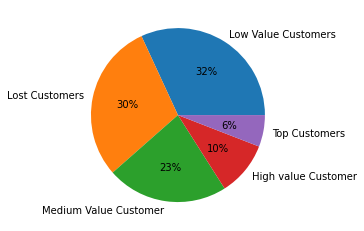

In [111]:
#visualize customer segments
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()


Text(0, 0.5, 'Total Profit')

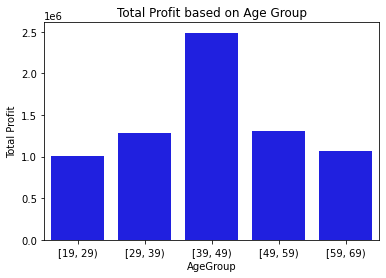

In [112]:
#if all_data.age > 10 and all_data.age: 
bins= [19, 29, 39, 49, 59 ,69]
all_data['AgeGroup'] = pd.cut(all_data['age'], bins=bins, right=False)
df_age = pd.DataFrame(all_data.groupby('AgeGroup')['profit'].sum())

df_age.columns = ['profit']

#visualize Total profit for each age group 
sns.barplot(x=df_age.index, y = 'profit', data=df_age, color='b' )
plt.title('Total Profit based on Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Total Profit')

Text(0, 0.5, 'Profit')

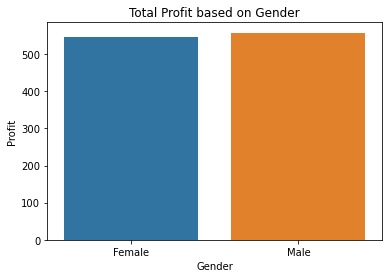

In [113]:
#create DataFrame total profit for each gender 
df_gender = pd.DataFrame(all_data.groupby('gender')['profit'].mean())
df_gender.columns = ['profit']

#visualize Total profit for each gender
sns.barplot(x=df_gender.index, y = 'profit', data=df_gender)
plt.title('Total Profit based on Gender')
plt.xlabel('Gender')
plt.ylabel("Profit")

Text(0, 0.5, 'Total Profit')

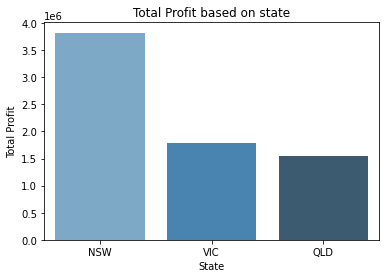

In [114]:
#create DataFrame total profit for each state 
df_state = pd.DataFrame(all_data.groupby('state')['profit'].sum().sort_values(ascending=False))
df_state.columns = ['profit']


#visualize Total profit for each state
sns.barplot(x=df_state.index, y = 'profit', data=df_state,  palette="Blues_d" )
plt.title('Total Profit based on state')
plt.xlabel('State')
plt.ylabel('Total Profit')

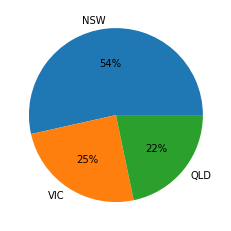

In [115]:
plt.pie(all_data.state.value_counts(),
        labels=all_data.state.value_counts().index,
        autopct='%.0f%%')
plt.show()

Text(0, 0.5, 'Product Line')

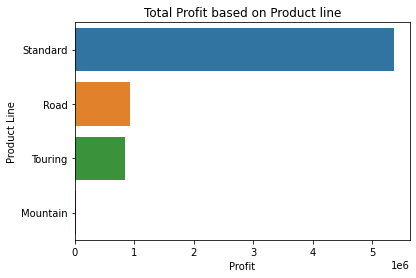

In [116]:
#creat dataframe total profit for each product line
df_product_line = pd.DataFrame(all_data.groupby('product_line')['profit'].sum().sort_values(ascending=False))
df_product_line.columns = ['profit']

#visualize total profit for each product line
sns.barplot(x='profit', y = df_product_line.index, data=df_product_line, orient='h')
plt.title('Total Profit based on Product line')
plt.xlabel('Profit')
plt.ylabel('Product Line')

Text(0, 0.5, 'Industry Category')

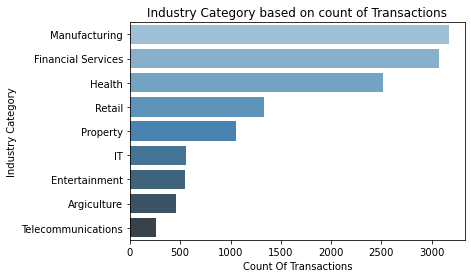

In [117]:
#Group _industry_category based on Transactions 
df_job_industry_category = pd.DataFrame(all_data.groupby('job_industry_category')['transaction_id'].count().sort_values(ascending=False))
df_job_industry_category.columns = ['transaction_id']

#visualization of the df
sns.barplot(x='transaction_id', y = df_job_industry_category.index, data=df_job_industry_category,  orient='h', palette="Blues_d")
plt.title('Industry Category based on count of Transactions')
plt.xlabel('Count Of Transactions')
plt.ylabel('Industry Category')

Text(0, 0.5, 'Industry Category')

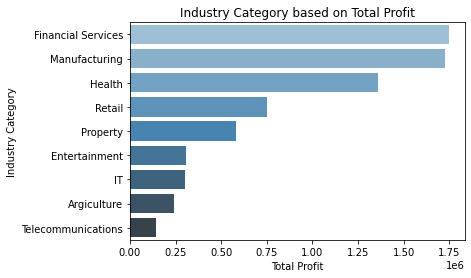

In [118]:
#Group _industry_category based on Transactions 
df_job_industry_category = pd.DataFrame(all_data.groupby('job_industry_category')['profit'].sum().sort_values(ascending=False))
df_job_industry_category.columns = ['profit']

#visualization of the df
sns.barplot(x='profit', y = df_job_industry_category.index, data=df_job_industry_category,  orient='h', palette="Blues_d")
plt.title('Industry Category based on Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Industry Category')

Text(0, 0.5, 'Brand')

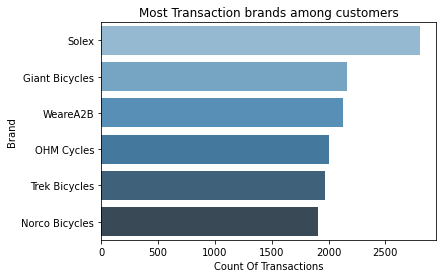

In [119]:
# Group Brands based on Transactions 
df_brands = pd.DataFrame(all_data.groupby('brand')['transaction_id'].count().sort_values(ascending=False))
df_brands.columns = ['transaction_id']

#visualization of the df
sns.barplot(x='transaction_id', y = df_brands.index, data=df_brands, palette="Blues_d")
plt.title('Most Transaction brands among customers')
plt.xlabel('Count Of Transactions')
plt.ylabel('Brand')

Text(0, 0.5, 'Brand')

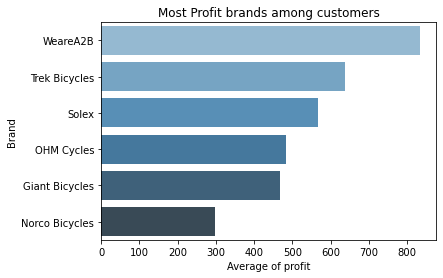

In [120]:
# Group Brands based on Transactions 
df_brands = pd.DataFrame(all_data.groupby('brand')['profit'].mean().sort_values(ascending=False))
df_brands.columns = ['profit']

#visualization of the df
sns.barplot(x='profit', y = df_brands.index, data=df_brands, palette="Blues_d")
plt.title('Most Profit brands among customers')
plt.xlabel('Average of profit')
plt.ylabel('Brand')

Text(0, 0.5, 'Wealth Segment')

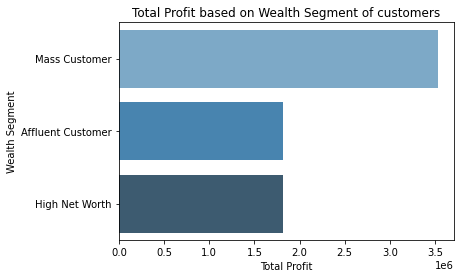

In [121]:
# Group wealth_segment based on avg profit 
df_brands = pd.DataFrame(all_data.groupby('wealth_segment')['profit'].sum().sort_values(ascending=False))
df_brands.columns = ['profit']

#visualization of the df
sns.barplot(x='profit', y = df_brands.index, data=df_brands, palette="Blues_d")
plt.title('Total Profit based on Wealth Segment of customers')
plt.xlabel('Total Profit')
plt.ylabel('Wealth Segment')

Text(0, 0.5, 'Total Profit')

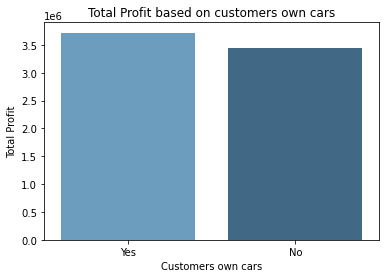

In [122]:
# Group wealth_segment based on avg profit 
df_brands = pd.DataFrame(all_data.groupby('owns_car')['profit'].sum().sort_values(ascending=False))
df_brands.columns = ['profit']

#visualization of the df
sns.barplot(x = df_brands.index, y='profit',  data=df_brands, palette="Blues_d")
plt.title('Total Profit based on customers own cars')
plt.xlabel('Customers own cars')
plt.ylabel('Total Profit')

In [123]:
data = pd.merge(rfm_df, all_data, how="inner", left_on='CustomerId', right_on='customer_id')

In [124]:
data.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'R_rank_norm',
       'F_rank_norm', 'M_rank_norm', 'RFM_Score', 'Customer_segment',
       'customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'transaction_id', 'product_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'age', 'AgeGroup'],
      dtype='object')

Text(0, 0.5, 'Customer Segment')

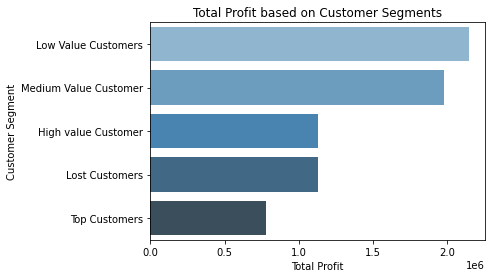

In [125]:
# Group customer_segment based on Total profit 
df_Customer = pd.DataFrame(data.groupby('Customer_segment')['profit'].sum().sort_values(ascending=False))
df_Customer.columns = ['profit']

#visualization of the df
sns.barplot(x='profit', y = df_Customer.index, data=df_Customer, palette="Blues_d")
plt.title('Total Profit based on Customer Segments')
plt.xlabel('Total Profit')
plt.ylabel('Customer Segment')

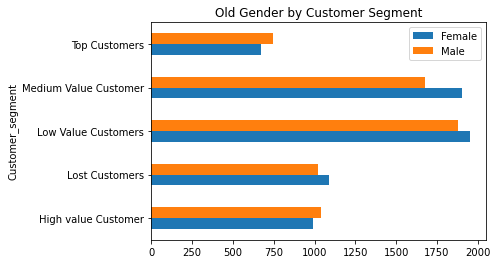

In [126]:
data.groupby('Customer_segment')['gender'] \
    .value_counts().sort_values() \
    .unstack(level=1) \
    .plot.barh(stacked=False, )

#axes.set_ylim([0, 900])
plt.title('Old Gender by Customer Segment')
plt.legend(['Female', 'Male'], loc='upper right')
plt.show()

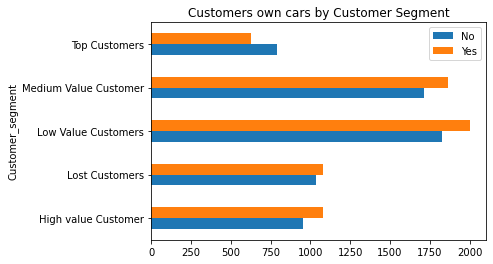

In [127]:
data.groupby('Customer_segment')['owns_car'] \
    .value_counts().sort_values() \
    .unstack(level=1) \
    .plot.barh(stacked=False, )

#axes.set_ylim([0, 900])
plt.title('Customers own cars by Customer Segment')
plt.legend(['No', 'Yes'], loc='upper right')
plt.show()

In [129]:
New_data.isnull().sum()

customer_id                              0.0
first_name                               0.0
last_name                                0.0
gender_x                                 0.0
past_3_years_bike_related_purchases_x    0.0
DOB_x                                    0.0
job_title_x                              0.0
job_industry_category_x                  0.0
wealth_segment_x                         0.0
deceased_indicator_x                     0.0
owns_car_x                               0.0
tenure_x                                 0.0
address_x                                0.0
postcode_x                               0.0
state_x                                  0.0
country_x                                0.0
property_valuation_x                     0.0
transaction_id                           0.0
product_id                               0.0
transaction_date                         0.0
online_order                             0.0
order_status                             0.0
brand     

In [ ]:
data.to_csv('dataCleaned.csv')

In [130]:
New_data.to_csv('New_dataCleaned.csv')